# Predict the Chance of admission to Graduate School

Author: Nuo Chen

Course Project, UC Irvine, Math 10, F22

## Introduction

Now is the application season for the graduate school, and students are always worried about if they can be admitted to the graduate school. I want to find out a model to predict the chance of admission by analyzing the admission data set.

## Preparing the Data

In [1]:
import pandas as pd
import altair as alt

In [2]:
#import the dataset and have a brief view about the first 5 rows
df = pd.read_csv("adm_data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


There are total 9 columns of this dataset, here is the description of these columns:

Serial No.: This is the serial number of each student, it represents different students.
GRE Score: The score of Graduate Record Examination, out of 340.
TOFEL Score: The score of Test of English as a Foreign Language, out of 120.
University Rating: Rating of the undergraduate university, out of 5.
SOP: Statement of Purpose, out of 5.
LOP: Letter of Recommendation, out of 5.
CGPA: Undergradute GPA, out of 10.
Research: Research experience, 0 or 1 (0 represents no experience while 1 represents student has experience).
Chance of Admit: The probability to be admitted to graduate school.

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

We will not use 'Serial No.' column to analyze the data, so we will delete this column, and also drop any missing data in the data set.

In [4]:
df = df.dropna()

In [5]:
df.drop("Serial No.", inplace=True, axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


The columns' names are too long, so I change some columns' names to make it easy to analyze.

In [6]:
df.rename(columns = {'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'Rate', 'Chance of Admit ':'Chance'}, inplace = True)

In [7]:
df.columns

Index(['GRE', 'TOEFL', 'Rate', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance'], dtype='object')

In [8]:
df.shape

(400, 8)

Now, there are total 400 student samples and 8 columns in this dataset.

## Comprehend Data with Chart

First, I want to find out the relationship of each factor with chance

In [61]:
data = ["GRE", "TOEFL", "Rate", "SOP", "LOR", "Research"]

In [56]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('GRE', scale=alt.Scale(zero=False)),
    y=alt.Y('Chance',scale=alt.Scale(zero=False)),
    color="Research:N"
)

alt.Chart(...)

From above chart, we can briefly conclude that student with higher GRE score will have greater chance to be admitted, and students who have higher GRE score also have more research experience.

In [53]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('GRE', scale=alt.Scale(zero=False)),
    y=alt.Y('Chance',scale=alt.Scale(zero=False)),
    color="TOEFL"
)

alt.Chart(...)

This chart is similar to the previous one. Student who have higher GRE also have higher TOEFL score and chance to be admitted.

In [57]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('GRE', scale=alt.Scale(zero=False)),
    y=alt.Y('Chance',scale=alt.Scale(zero=False)),
    color="CGPA"
)

alt.Chart(...)

Both chart are similar that student who having a good score also did well in other aspects. Now I want to see how the university rating and GPA affect the chance.

In [60]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('CGPA', scale=alt.Scale(zero=False)),
    y=alt.Y('Chance',scale=alt.Scale(zero=False))
).facet(
    column="Rate"
)

alt.FacetChart(...)

From the chart, we can see most of the students in the lowest university rating has less chance and their GPA are also lower than other students. With the university rating become better, students' GPA are imporved, and the scatter is moving to the up-right corner, which means that the Chance imporved when the rating is better.

I did not analyze all the relation between all the data, because I think it would be too long and unnecessary. However, above chart could provide us a preview that students who have better condition on these factors are commonly have higher chance. In this case, I want to find out the relationship, and find a model to predict the chance.

## Linear Regression

The first model came into my mind is the linear regression, since it looks like the relationship between the factors with chance is linear increasing. In this case, I first try to find out the linear equation.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
cols = ['GRE', 'TOEFL', 'Rate', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df[cols]
y = df["Chance"]

In [12]:
#fit the linear regression model
reg = LinearRegression()
reg.fit(X,y)
df["Pred"] = reg.predict(X)
pd.Series(reg.coef_, index=cols)

GRE         0.001737
TOEFL       0.002920
Rate        0.005717
SOP        -0.003305
LOR         0.022353
CGPA        0.118939
Research    0.024525
dtype: float64

In [13]:
#Find the equation of the linear regression model
print(f"The equation of the linear regression model is Chance = {cols[0]} x {reg.coef_[0]} + {cols[1]} x {reg.coef_[1]} + {cols[2]} x {reg.coef_[2]} + {cols[3]} x {reg.coef_[3]} + {cols[4]} x {reg.coef_[4]} + {cols[5]} x {reg.coef_[5]} + {cols[6]} x {reg.coef_[6]}")

The equation of the linear regression model is Chance = GRE x 0.00173741157101406 + TOEFL x 0.002919576816925125 + Rate x 0.005716658134921038 + SOP x -0.0033051690450663545 + LOR  x 0.022353127328359396 + CGPA x 0.11893945359703187 + Research x 0.024525106295323548


In this case, we found the linear equation of all factors related to the chance of admission. I found out that the coefficient are too small, and I think it is because the scale of the chance is from 0-1, while all other factors have bigger scale like 0-340 or 0-120. So, the coefficient must be small enough to attain the number less than 1.

## Creating training and test set

Here I start to train the linear regression model.

In [14]:
X = df[cols]
y = df["Chance"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression()

In [16]:
# Test the accuracy of this linear regression model
print(f"The accuracy of the training set is {reg1.score(X_train,y_train)}")
print(f"The accuracy of the test set is {reg1.score(X_test,y_test)}")

The accuracy of the training set is 0.8029928607242408
The accuracy of the test set is 0.8008217476704986


I think this linear regression model is kind of useful to predict the admission chance based on the accuracy, which is about 80%. I will also try other models to test it.

## Decision Tree Model

There are a lot of factors would affect the chance of admission. I want to try the decision tree model and find out which factor is most important.

In [17]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X,y,test_size=0.2,random_state=9)
from sklearn.tree import DecisionTreeRegressor
reg2 = DecisionTreeRegressor(max_depth=20,max_leaf_nodes=50)
reg2.fit(X0_train,y0_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=50)

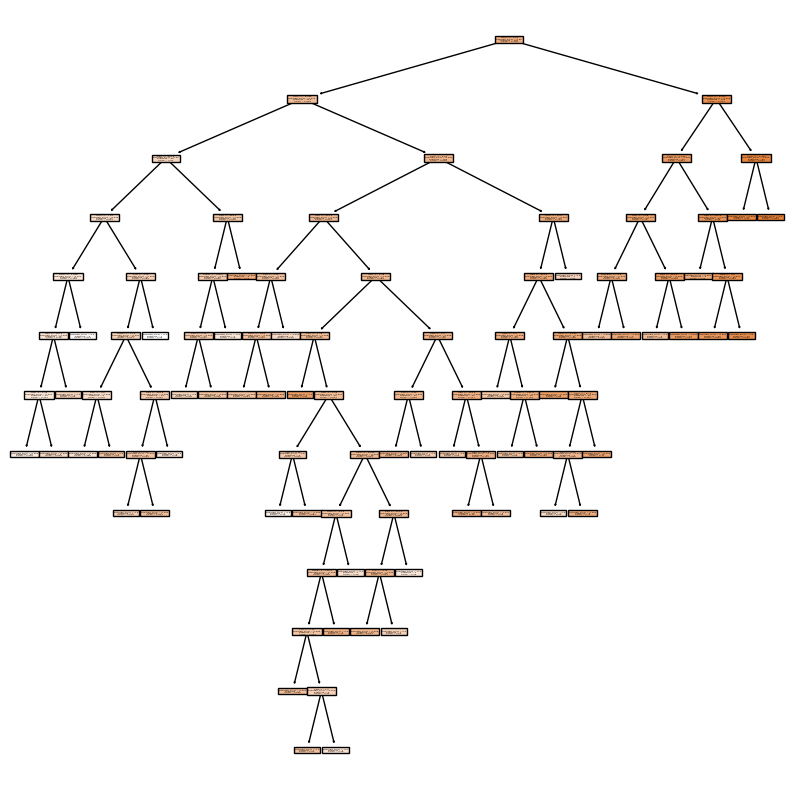

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10,10))
_ = plot_tree(
    reg2,
    feature_names=reg2.feature_names_in_,
    filled=True
)

In [19]:
reg2.score(X0_train,y0_train)

0.933607333099658

In [20]:
reg2.score(X0_test,y0_test)

0.7141191237370301

I randomly choose some numbers of max_depth and max_leaf_nodes to find out the score of the training set and test set. The score seems not working well, so I will use the U-shape test error curve to find the max_depth and max_leaf_nodes of fitting model.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_dict={}
test_dict={}
for n in range(2,201):
    reg = DecisionTreeRegressor(max_leaf_nodes=n, max_depth=50, criterion="squared_error")
    reg.fit(X0_train, y0_train)
    train_error = mean_squared_error(y0_train, reg.predict(X0_train))
    train_dict[n] = train_error
    test_error = mean_squared_error(y0_test, reg.predict(X0_test))
    test_dict[n] = test_error

In [22]:
train_ser = pd.Series(train_dict)
test_ser = pd.Series(test_dict)
train_ser.name = "train"
test_ser.name = "test"
df_loss = pd.concat((train_ser, test_ser), axis=1)
df_loss.reset_index(inplace=True)
df_loss.rename({"index": "max_leaf_nodes"}, axis=1, inplace=True)
df_melted = df_loss.melt(id_vars="max_leaf_nodes", var_name="Type", value_name="Loss")

In [23]:
import altair as alt
alt.Chart(df_melted).mark_line().encode(
    x="max_leaf_nodes",
    y="Loss",
    color=alt.Color("Type", scale=alt.Scale(domain=["train", "test"]))
)

alt.Chart(...)

From the U-shape test error curve, we could find that when the max_leaf_nodes is between 0-10, the model will fit well. In this case, we will try this range of max_leaf_nodes to find out the best fit model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg3 = DecisionTreeRegressor(max_leaf_nodes=8)
reg3.fit(X0_train,y0_train)

DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
print(f"The accuracy of the training set is {reg3.score(X0_train,y0_train)}")
print(f"The accuracy of the test set is {reg3.score(X0_test,y0_test)}")

The accuracy of the training set is 0.7787843629561872
The accuracy of the test set is 0.8035914207373919


Now the score of the test set is over 80%, and the training set is within 5% of the accuracy, so we could use this model to predict now.

In [26]:
# Finding the features importances
pd.Series(reg3.feature_importances_, index=cols)

GRE         0.022848
TOEFL       0.000000
Rate        0.000000
SOP         0.009752
LOR         0.000000
CGPA        0.967400
Research    0.000000
dtype: float64

In [27]:
df1 = pd.DataFrame({"feature": reg3.feature_names_in_, "importance": reg3.feature_importances_})

In [28]:
alt.Chart(df1).mark_bar().encode(
    x="importance",
    y="feature"
)

alt.Chart(...)

By using the DecisionTreeRegressor Model, we could find out that the features that is more important to the chance of admission is CGPA and GRE score.

## KNeighborsRegressor

We now have finded out the two important features to determine the chance of admission. Let's using KNeighborsRegressor to predict the chance by using the CGPA andd GRE columns.

In [29]:
X1 = df[["CGPA","GRE"]]
y1 = df["Chance"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=10)

In [30]:
# Try to find the K value for the KNeighborsRegressor model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
def get_scores(k):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X1_train, y1_train)
    train_error = mean_absolute_error(neigh.predict(X1_train), y1_train)
    test_error = mean_absolute_error(neigh.predict(X1_test), y1_test)
    return (train_error, test_error)

In [31]:
import numpy as np
df_scores = pd.DataFrame({"k":range(1,150),"train_error":np.nan,"test_error":np.nan})
for i in df_scores.index:
    df_scores.loc[i,["train_error","test_error"]] = get_scores(df_scores.loc[i,"k"])

In [32]:
df_scores

,k,train_error,test_error
0,1,0.002000,0.071500
1,2,0.034969,0.058625
2,3,0.042604,0.058583
3,4,0.045594,0.057125
4,5,0.048181,0.057600
...,...,...,...
144,145,0.075154,0.069567
145,146,0.075392,0.069720
146,147,0.075582,0.069930
147,148,0.075860,0.070373


In [33]:
ctrain = alt.Chart(df_scores).mark_line().encode(
    x = "k",
    y = "train_error",
    tooltip=['k']
)

ctest = alt.Chart(df_scores).mark_line(color="orange").encode(
    x = "k",
    y = "test_error",
    tooltip=['k']
)

ctrain + ctest

alt.LayerChart(...)

By looking at the data frame, I can find out that the model is overfit when the k is too small, and the model is underfit when the k is big. I will choose k = 13 by using tooltip, since it is the point that is not underfit or overfit, and it works better on the traning set.

In [38]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=13)
neigh.fit(X1_train,y1_train)

KNeighborsRegressor(n_neighbors=13)

In [39]:
print(f"The accuracy of the training set is {neigh.score(X1_train,y1_train)}")
print(f"The accuracy of the test set is {neigh.score(X1_test,y1_test)}")

The accuracy of the training set is 0.7474518013464138
The accuracy of the test set is 0.6350239496022807


The score of the training set and test set are both under 80%. Under this condition, I do not think it is a good choice to use KNeighborRegressor to conclude the result.

## Prediction

After trying several model, I think the linear regression is the best fit model above. When we have a model to predict, let's do some prediction.
Suppose there is a student has GRE 325, TOEFL 100, Rate 4, SOP 3, LOR 3, CGPA 8.5, Research 1. What is the chance of this student to be admitter to graduate school?

In [64]:
chance = np.array([325, 100, 4, 3, 3, 8.5, 1]).reshape(-1,7)

In [65]:
reg1.predict(chance)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.70657928])

In this case, the chance is about 70.66%

## Summary

I tried 3 different models to predict the chance of admission, and find out the linear regression model is working best, and the KNeighborRegression is not suitable in this case. I also used decision tree model to find out the most important 2 features that affect the chance, which are GRE score and CGPA. Finally, I predict a chance of a student to be admitted by using the linear regression model I trained.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university
A source from Kaggle.

* List any other references that you found helpful.
https://scikit-learn.org/0.16/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html
I learned KNeighborsRegressor here.
https://altair-viz.github.io/gallery/index.html#interactive-charts
I learned some altair chart here

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abecaa38-30bf-49e1-82fe-dd4ef5924e1e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>